<a href="https://colab.research.google.com/github/mohadesehsotoudehnia/FIS-projects/blob/main/Part2_FinalProject%20/%20FIS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Exploration**

In [ ]:
!pip install -q gdown

In [ ]:
!gdown --id 1Wr5H3HQ2BbCuKjvs-N5Wh8l_NkiMpH7d -O brain_tumor.zip

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Wr5H3HQ2BbCuKjvs-N5Wh8l_NkiMpH7d
From (redirected): https://drive.google.com/uc?id=1Wr5H3HQ2BbCuKjvs-N5Wh8l_NkiMpH7d&confirm=t&uuid=c985375e-324f-4385-977b-b89aa3c55cb7
To: /content/brain_tumor.zip
100% 91.0M/91.0M [00:00<00:00, 145MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("brain_tumor.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")


In [ ]:
import os

base_path = "dataset"

print("Training Data:")
for folder in os.listdir(os.path.join(base_path, "Training")):
    path = os.path.join(base_path, "Training", folder)
    print(folder, ":", len(os.listdir(path)))

print("\nTesting Data:")
for folder in os.listdir(os.path.join(base_path, "Testing")):
    path = os.path.join(base_path, "Testing", folder)
    print(folder, ":", len(os.listdir(path)))


Training Data:
pituitary_tumor : 827
no_tumor : 395
glioma_tumor : 826
meningioma_tumor : 822

Testing Data:
pituitary_tumor : 74
no_tumor : 105
glioma_tumor : 100
meningioma_tumor : 115


In [ ]:
base_path = "dataset"

print("Training folders:", os.listdir(os.path.join(base_path, "Training")))
print("Testing folders:", os.listdir(os.path.join(base_path, "Testing")))

Training folders: ['pituitary_tumor', 'no_tumor', 'glioma_tumor', 'meningioma_tumor']
Testing folders: ['pituitary_tumor', 'no_tumor', 'glioma_tumor', 'meningioma_tumor']


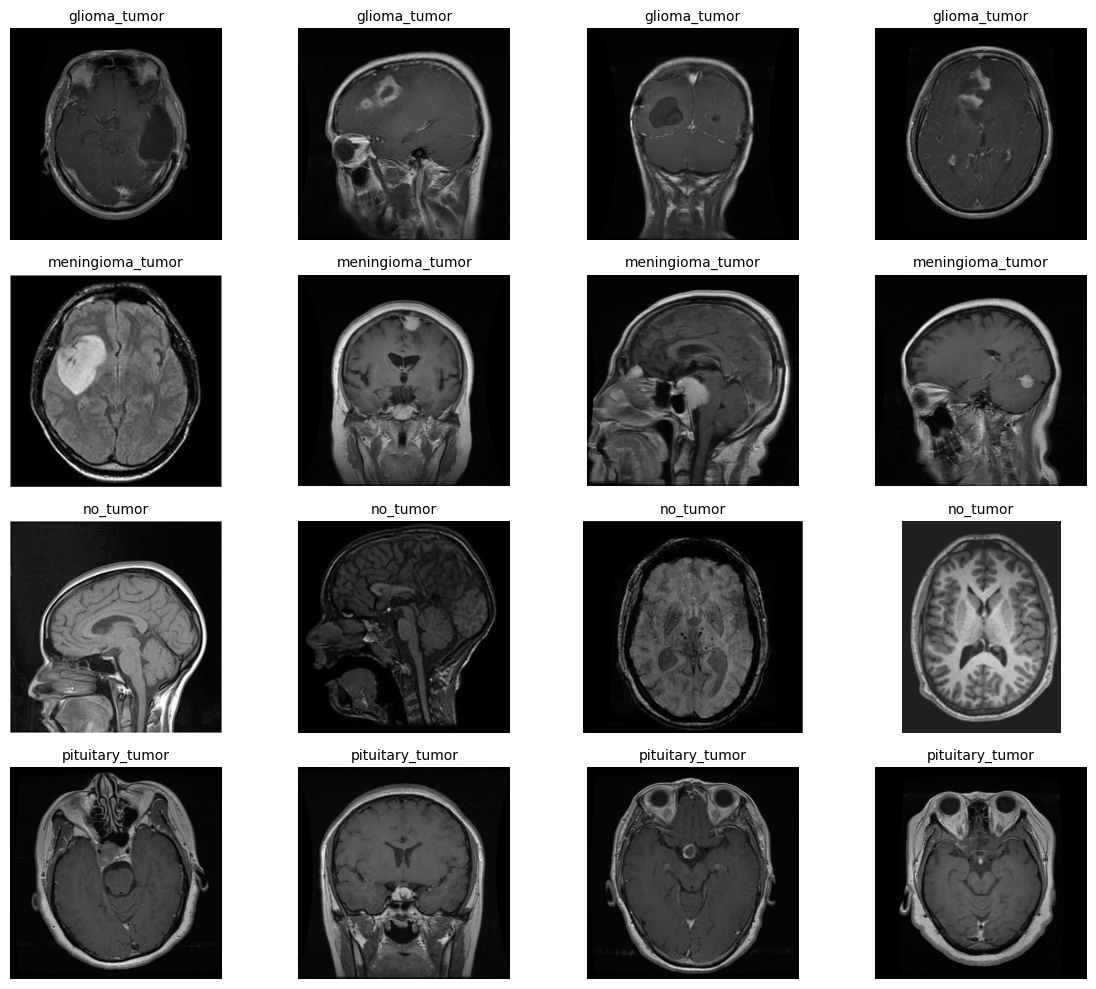

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

base_path = "dataset"
train_dir = os.path.join(base_path, "Training")
classes = sorted(os.listdir(train_dir))

samples_per_class = 4

plt.figure(figsize=(12, 10))
plot_index = 1

for cls in classes:
    cls_path = os.path.join(train_dir, cls)
    images = [f for f in os.listdir(cls_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    chosen = random.sample(images, min(samples_per_class, len(images)))

    for img_name in chosen:
        img_path = os.path.join(cls_path, img_name)
        img = Image.open(img_path).convert("RGB")

        plt.subplot(len(classes), samples_per_class, plot_index)
        plt.imshow(img)
        plt.title(cls, fontsize=10)
        plt.axis("off")
        plot_index += 1

plt.tight_layout()
plt.show()


In [ ]:
import os
from PIL import Image

def collect_image_sizes(folder_path, max_images=2000):
    sizes = []
    count = 0

    for root, _, files in os.walk(folder_path):
        for f in files:
            if f.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, f)
                try:
                    with Image.open(img_path) as img:
                        sizes.append(img.size)  # (width, height)
                    count += 1
                    if count >= max_images:
                        return sizes
                except:
                    continue
    return sizes

train_sizes = collect_image_sizes(os.path.join(base_path, "Training"), max_images=2000)
test_sizes  = collect_image_sizes(os.path.join(base_path, "Testing"),  max_images=1000)

print("Train: total checked =", len(train_sizes))
print("Test : total checked =", len(test_sizes))


from collections import Counter
print("\nMost common Train sizes:", Counter(train_sizes).most_common(5))
print("Most common Test sizes :", Counter(test_sizes).most_common(5))

Train: total checked = 2000
Test : total checked = 394

Most common Train sizes: [((512, 512), 1582), ((236, 236), 46), ((225, 225), 22), ((256, 256), 14), ((630, 630), 14)]
Most common Test sizes : [((236, 236), 33), ((512, 512), 32), ((225, 225), 13), ((442, 442), 7), ((554, 554), 5)]


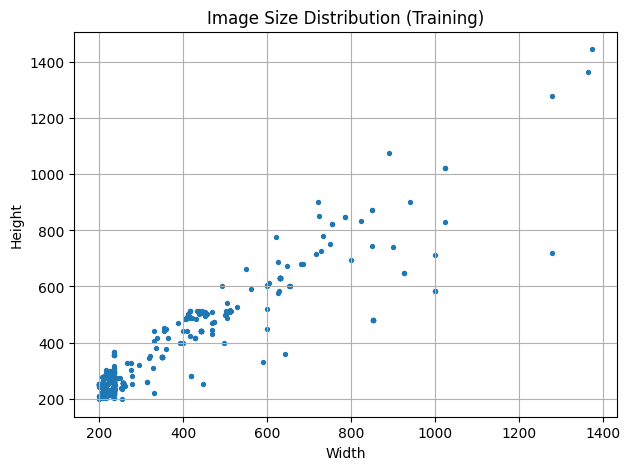

In [ ]:
import matplotlib.pyplot as plt

train_w = [s[0] for s in train_sizes]
train_h = [s[1] for s in train_sizes]

plt.figure(figsize=(7,5))
plt.scatter(train_w, train_h, s=8)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Size Distribution (Training)")
plt.grid(True)
plt.show()

In [ ]:
import os

base_path = "dataset"
train_path = os.path.join(base_path, "Training")

class_counts = {}
total_images = 0

for cls in os.listdir(train_path):
    path = os.path.join(train_path, cls)
    count = len(os.listdir(path))
    class_counts[cls] = count
    total_images += count

print("Class Distribution (Training):")
for cls, count in class_counts.items():
    percentage = (count / total_images) * 100
    print(f"{cls}: {count} images ({percentage:.2f}%)")

print("\nTotal images:", total_images)

Class Distribution (Training):
pituitary_tumor: 827 images (28.82%)
no_tumor: 395 images (13.76%)
glioma_tumor: 826 images (28.78%)
meningioma_tumor: 822 images (28.64%)

Total images: 2870


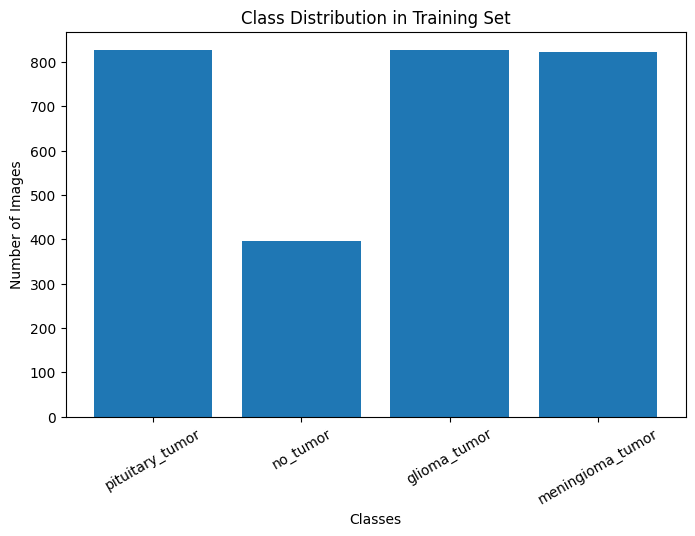

In [ ]:
import matplotlib.pyplot as plt

classes = list(class_counts.keys())
counts = list(class_counts.values())

plt.figure(figsize=(8,5))
plt.bar(classes, counts)
plt.xticks(rotation=30)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Training Set")
plt.show()

In [ ]:
import os

base_path = "dataset"
test_path = os.path.join(base_path, "Testing")

test_counts = {}
test_total = 0

for cls in os.listdir(test_path):
    path = os.path.join(test_path, cls)
    count = len(os.listdir(path))
    test_counts[cls] = count
    test_total += count

print("Class Distribution (Testing):")
for cls, count in test_counts.items():
    percentage = (count / test_total) * 100
    print(f"{cls}: {count} images ({percentage:.2f}%)")

print("\nTotal images:", test_total)

Class Distribution (Testing):
pituitary_tumor: 74 images (18.78%)
no_tumor: 105 images (26.65%)
glioma_tumor: 100 images (25.38%)
meningioma_tumor: 115 images (29.19%)

Total images: 394


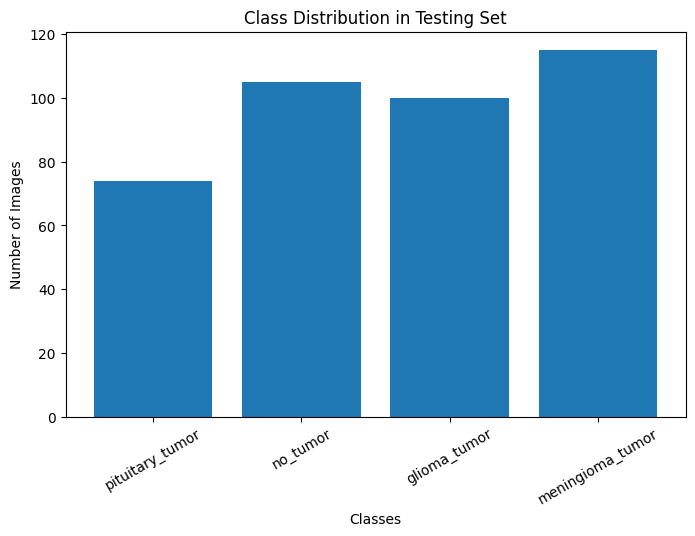

In [ ]:
import matplotlib.pyplot as plt

classes = list(test_counts.keys())
counts = list(test_counts.values())

plt.figure(figsize=(8,5))
plt.bar(classes, counts)
plt.xticks(rotation=30)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Testing Set")
plt.show()

# **Data Preprocessing**

In [ ]:
import os
from PIL import Image

base_path = "dataset"
folders_to_check = [
    os.path.join(base_path, "Training"),
    os.path.join(base_path, "Testing")
]

valid_ext = (".jpg", ".jpeg", ".png")

corrupted_files = []
total_checked = 0

for split_path in folders_to_check:
    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)
        if not os.path.isdir(cls_path):
            continue

        for fname in os.listdir(cls_path):
            if not fname.lower().endswith(valid_ext):
                continue

            fpath = os.path.join(cls_path, fname)
            total_checked += 1
            try:
                # check file integrity
                with Image.open(fpath) as img:
                    img.verify()

                # reopen to ensure it loads correctly
                with Image.open(fpath) as img:
                    _ = img.convert("RGB")
            except Exception as e:
                corrupted_files.append((fpath, str(e)))

print("Total images checked:", total_checked)
print("Corrupted images found:", len(corrupted_files))

for item in corrupted_files[:10]:
    print(item[0], "->", item[1])


Total images checked: 3264
Corrupted images found: 0


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

IMG_SIZE = 224
BATCH_SIZE = 32
SEED = 42

# Load training data (80%)
train_ds_224 = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Training",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    validation_split=0.2,
    subset="training",
    shuffle=True,
    seed=SEED
)

# Load validation data (20%)
val_ds_224 = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Training",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    validation_split=0.2,
    subset="validation",
    shuffle=False,
    seed=SEED
)

# Load test data
test_ds_224 = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Testing",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=False
)

print("Dataset prepared.")

# Compute class weights
y_train = []

for _, labels in train_ds_224:
    y_train.extend(np.argmax(labels.numpy(), axis=1))

y_train = np.array(y_train)
classes = np.unique(y_train)

class_weights_values = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)

class_weights = dict(zip(classes, class_weights_values))

print("Class weights:", class_weights)

Found 2870 files belonging to 4 classes.
Using 2296 files for training.
Found 2870 files belonging to 4 classes.
Using 574 files for validation.
Found 394 files belonging to 4 classes.
Dataset prepared.
Class weights: {np.int64(0): np.float64(0.8503703703703703), np.int64(1): np.float64(0.8871715610510046), np.int64(2): np.float64(1.8050314465408805), np.int64(3): np.float64(0.875)}


In [ ]:
import tensorflow as tf

IMG_SIZE = 224
BATCH_SIZE = 32

train_ds_224 = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Training",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=True,
    seed=42
)

val_ds_224 = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Training",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    validation_split=0.2,
    subset="validation",
    seed=42
)

test_ds_224 = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Testing",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=False
)

print("Resize to 224x224 completed.")


Found 2870 files belonging to 4 classes.
Found 2870 files belonging to 4 classes.
Using 574 files for validation.
Found 394 files belonging to 4 classes.
Resize to 224x224 completed.


In [ ]:
IMG_SIZE = 256
BATCH_SIZE = 32

train_ds_256 = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Training",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    validation_split=0.2,
    subset="training",
    seed=42
)

val_ds_256 = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Training",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    validation_split=0.2,
    subset="validation",
    seed=42
)

test_ds_256 = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Testing",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=False
)

print("Resize to 256x256 completed.")

Found 2870 files belonging to 4 classes.
Using 2296 files for training.
Found 2870 files belonging to 4 classes.
Using 574 files for validation.
Found 394 files belonging to 4 classes.
Resize to 256x256 completed.


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds_224 = train_ds_224.map(lambda x, y: (normalization_layer(x), y))
val_ds_224   = val_ds_224.map(lambda x, y: (normalization_layer(x), y))
test_ds_224  = test_ds_224.map(lambda x, y: (normalization_layer(x), y))

print("Normalization applied (224).")

Normalization applied (224).


In [ ]:
for images, labels in train_ds_224.take(1):
    print("Min pixel value:", tf.reduce_min(images).numpy())
    print("Max pixel value:", tf.reduce_max(images).numpy())


Min pixel value: 0.0
Max pixel value: 1.0


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds_256 = train_ds_256.map(lambda x, y: (normalization_layer(x), y))
val_ds_256   = val_ds_256.map(lambda x, y: (normalization_layer(x), y))
test_ds_256  = test_ds_256.map(lambda x, y: (normalization_layer(x), y))

print("Normalization applied (256).")


Normalization applied (256).


In [ ]:
for images, labels in train_ds_256.take(1):
    print("Min pixel value:", tf.reduce_min(images).numpy())
    print("Max pixel value:", tf.reduce_max(images).numpy())


Min pixel value: 0.0
Max pixel value: 1.0


In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1)
])

print("Data augmentation layer created.")

Data augmentation layer created.


In [ ]:
train_ds_224_aug = train_ds_224.map(lambda x, y: (data_augmentation(x, training=True), y))

print("Augmentation applied to training dataset (224).")


Augmentation applied to training dataset (224).


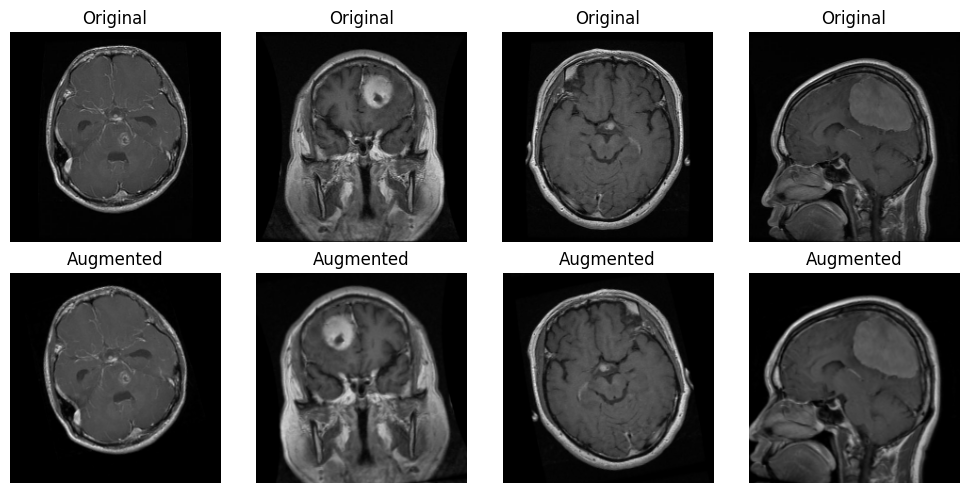

In [ ]:
import matplotlib.pyplot as plt

for images, labels in train_ds_224.take(1):
    augmented_images = data_augmentation(images, training=True)

    plt.figure(figsize=(10,5))
    for i in range(4):
        plt.subplot(2,4,i+1)
        plt.imshow(images[i])
        plt.axis("off")
        plt.title("Original")

        plt.subplot(2,4,i+5)
        plt.imshow(augmented_images[i])
        plt.axis("off")
        plt.title("Augmented")

    plt.tight_layout()
    plt.show()
    break


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds_224_aug = train_ds_224_aug.prefetch(AUTOTUNE)
val_ds_224 = val_ds_224.prefetch(AUTOTUNE)
test_ds_224 = test_ds_224.prefetch(AUTOTUNE)


# **Dimensionality Reduction**

In [ ]:
import numpy as np

X_train = []
y_train = []

for images, labels in train_ds_224:
    X_train.append(images.numpy())
    y_train.append(labels.numpy())

X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

# Flatten images
X_train_flat = X_train.reshape(X_train.shape[0], -1)

print("Original shape:", X_train.shape)
print("Flattened shape:", X_train_flat.shape)

Original shape: (2296, 224, 224, 3)
Flattened shape: (2296, 150528)


In [ ]:
from sklearn.decomposition import PCA
import time

# Reduce to 200 components
n_components = 200

start_time = time.time()

pca = PCA(n_components=n_components, random_state=42)
X_train_pca = pca.fit_transform(X_train_flat)

end_time = time.time()

print("Original feature size:", X_train_flat.shape[1])
print("Reduced feature size:", X_train_pca.shape[1])
print("Explained variance ratio sum:", np.sum(pca.explained_variance_ratio_))
print("PCA computation time (seconds):", round(end_time - start_time, 2))

Original feature size: 150528
Reduced feature size: 200
Explained variance ratio sum: 0.80710864
PCA computation time (seconds): 63.7


In [ ]:
# Extract test data
X_test = []
y_test = []

for images, labels in test_ds_224:
    X_test.append(images.numpy())
    y_test.append(labels.numpy())

X_test = np.concatenate(X_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

# Flatten
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Apply trained PCA
X_test_pca = pca.transform(X_test_flat)

# Convert labels from one-hot
y_test_labels = np.argmax(y_test, axis=1)

print("Test PCA shape:", X_test_pca.shape)


Test PCA shape: (394, 200)


In [ ]:
# Extract validation data
X_val = []
y_val = []

for images, labels in val_ds_224:
    X_val.append(images.numpy())
    y_val.append(labels.numpy())

X_val = np.concatenate(X_val, axis=0)
y_val = np.concatenate(y_val, axis=0)

# Flatten
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Apply trained PCA
X_val_pca = pca.transform(X_val_flat)

# Convert labels from one-hot
y_val_labels = np.argmax(y_val, axis=1)

print("Validation PCA shape:", X_val_pca.shape)


Validation PCA shape: (574, 200)


# **Classical Model: PCA + Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

# Convert train labels
y_train_labels = np.argmax(y_train, axis=1)

start_time = time.time()

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_pca, y_train_labels)

end_time = time.time()

# Predict
y_pred = model_lr.predict(X_test_pca)

accuracy = accuracy_score(y_test_labels, y_pred)

print("Accuracy (PCA + Logistic Regression):", round(accuracy, 4))
print("Training time (seconds):", round(end_time - start_time, 2))


Accuracy (PCA + Logistic Regression): 0.5736
Training time (seconds): 13.94


# **CNN**

In [ ]:
from tensorflow.keras import layers, models

model_cnn = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(16, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),

    layers.Dense(4, activation="softmax")
])

model_cnn.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,768,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,792,804 (10.65 MB)

 Trainable params: 2,792,804 (10.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_cnn.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("Model compiled.")


Model compiled.


In [ ]:
import time

EPOCHS = 5

start_time = time.time()

history = model_cnn.fit(
    train_ds_224_aug,
    validation_data=val_ds_224,
    epochs=EPOCHS,
    class_weight=class_weights
)

end_time = time.time()
print("Training time (seconds):", round(end_time - start_time, 2))


Epoch 1/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.5509 - loss: 1.0152 - val_accuracy: 0.8972 - val_loss: 0.7185
Epoch 2/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.6067 - loss: 0.9033 - val_accuracy: 0.8693 - val_loss: 0.6501
Epoch 3/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.6369 - loss: 0.8305 - val_accuracy: 0.8868 - val_loss: 0.3717
Epoch 4/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.6372 - loss: 0.8064 - val_accuracy: 0.9704 - val_loss: 0.2280
Epoch 5/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7057 - loss: 0.6890 - val_accuracy: 0.9059 - val_loss: 0.3738
Training time (seconds): 728.43


# **Test Set Evaluation (CNN)**

In [ ]:
test_loss, test_acc = model_cnn.evaluate(test_ds_224, verbose=1)
print("Test Loss:", round(test_loss, 4))
print("Test Accuracy:", round(test_acc, 4))


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 418ms/step - accuracy: 0.2433 - loss: 4.0178
Test Loss: 2.4234
Test Accuracy: 0.4188


In [ ]:
import numpy as np

y_true = []
y_prob = []

for images, labels in test_ds_224:
    probs = model_cnn.predict(images, verbose=0)
    y_prob.append(probs)
    y_true.append(labels.numpy())

y_prob = np.concatenate(y_prob, axis=0)          # shape: (N, 4)
y_true = np.concatenate(y_true, axis=0)          # one-hot: (N, 4)

y_true_labels = np.argmax(y_true, axis=1)        # shape: (N,)
y_pred_labels = np.argmax(y_prob, axis=1)        # shape: (N,)

print("y_true_labels shape:", y_true_labels.shape)
print("y_pred_labels shape:", y_pred_labels.shape)
print("First 10 true labels:", y_true_labels[:10])
print("First 10 pred labels:", y_pred_labels[:10])


y_true_labels shape: (394,)
y_pred_labels shape: (394,)
First 10 true labels: [0 0 0 0 0 0 0 0 0 0]
First 10 pred labels: [2 2 3 3 3 2 2 2 2 2]


In [ ]:
import os

class_names = sorted(os.listdir("dataset/Testing"))
print("Class names:", class_names)


Class names: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


# **Confusion Matrix & Metrics Analysis**

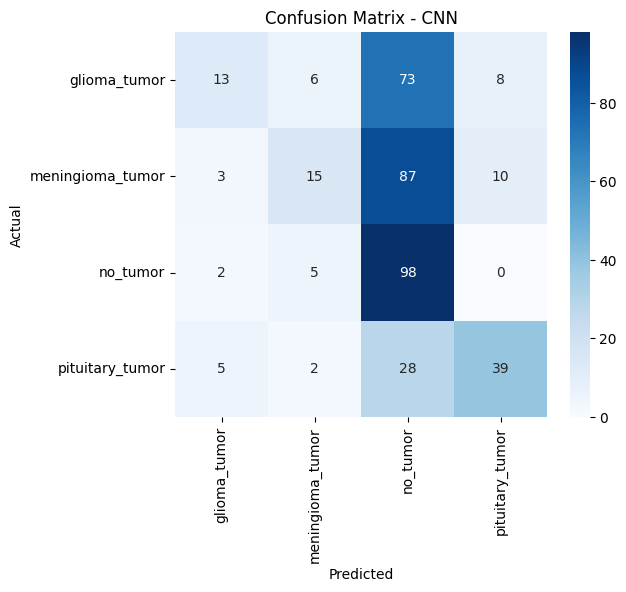

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CNN")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(
    y_true_labels,
    y_pred_labels,
    target_names=class_names
)

print(report)

                  precision    recall  f1-score   support

    glioma_tumor       0.57      0.13      0.21       100
meningioma_tumor       0.54      0.13      0.21       115
        no_tumor       0.34      0.93      0.50       105
 pituitary_tumor       0.68      0.53      0.60        74

        accuracy                           0.42       394
       macro avg       0.53      0.43      0.38       394
    weighted avg       0.52      0.42      0.36       394



# **Learning Curves & Overfitting Analysis**

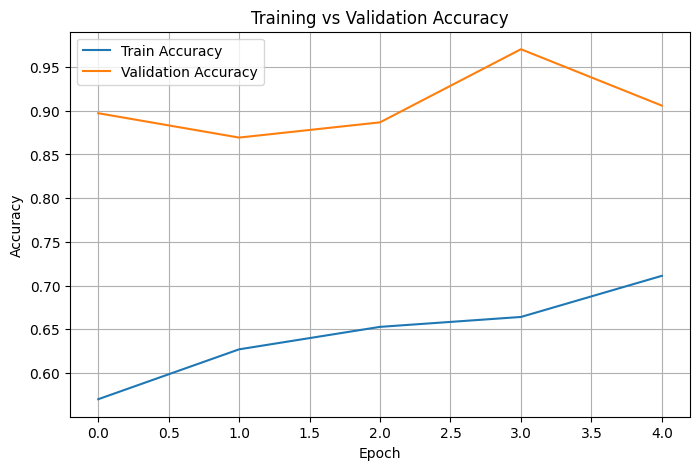

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)

plt.show()


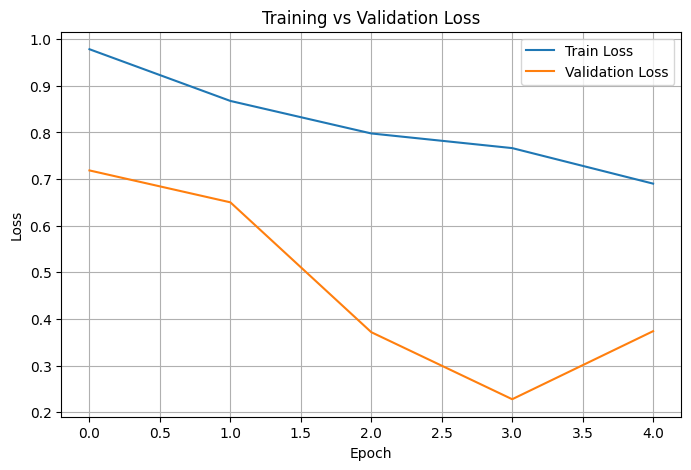

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

plt.show()



# **Preprocessing Scenarios Comparison for CNN**

In [ ]:
# Scenario 1: No Augmentation, No Class Weights
train_ds_no_aug = train_ds_224  # No augmentation
val_ds_no_aug = val_ds_224

train_ds_no_aug = train_ds_no_aug.cache().prefetch(tf.data.AUTOTUNE)
val_ds_no_aug = val_ds_no_aug.cache().prefetch(tf.data.AUTOTUNE)

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_no_aug = model_cnn.fit(train_ds_no_aug, validation_data=val_ds_no_aug, epochs=5)



Epoch 1/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.7169 - loss: 0.6579 - val_accuracy: 0.9634 - val_loss: 0.2026
Epoch 2/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.7888 - loss: 0.5154 - val_accuracy: 0.9686 - val_loss: 0.1478
Epoch 3/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.8276 - loss: 0.4302 - val_accuracy: 0.9704 - val_loss: 0.1086
Epoch 4/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.8366 - loss: 0.4169 - val_accuracy: 0.9652 - val_loss: 0.1158
Epoch 5/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.8525 - loss: 0.3563 - val_accuracy: 0.9913 - val_loss: 0.0633


In [ ]:
# Scenario 2: Only Augmentation
train_ds_aug = train_ds_224.map(lambda x, y: (data_augmentation(x, training=True), y))  # Apply augmentation

train_ds_aug = train_ds_aug.cache().prefetch(tf.data.AUTOTUNE)
val_ds_224 = val_ds_224.cache().prefetch(tf.data.AUTOTUNE)

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_aug = model_cnn.fit(train_ds_aug, validation_data=val_ds_224, epochs=5)



Epoch 1/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.6887 - loss: 0.7473 - val_accuracy: 0.9913 - val_loss: 0.0510
Epoch 2/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.7802 - loss: 0.5177 - val_accuracy: 0.9895 - val_loss: 0.0565
Epoch 3/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.8141 - loss: 0.4375 - val_accuracy: 0.9983 - val_loss: 0.0291
Epoch 4/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.8474 - loss: 0.3859 - val_accuracy: 0.9930 - val_loss: 0.0384
Epoch 5/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.8567 - loss: 0.3479 - val_accuracy: 0.9965 - val_loss: 0.0185


In [ ]:
# Scenario 3: Only Class Weights
train_ds_224 = train_ds_224.cache().prefetch(tf.data.AUTOTUNE)
val_ds_224 = val_ds_224.cache().prefetch(tf.data.AUTOTUNE)

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_class_weights = model_cnn.fit(train_ds_224, validation_data=val_ds_224, epochs=5, class_weight=class_weights)


Epoch 1/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.8725 - loss: 0.3115 - val_accuracy: 0.9861 - val_loss: 0.0712
Epoch 2/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.9047 - loss: 0.2392 - val_accuracy: 0.9965 - val_loss: 0.0136
Epoch 3/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.9177 - loss: 0.2068 - val_accuracy: 0.9843 - val_loss: 0.0457
Epoch 4/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.9203 - loss: 0.1812 - val_accuracy: 0.9913 - val_loss: 0.0296
Epoch 5/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.9281 - loss: 0.1659 - val_accuracy: 0.9983 - val_loss: 0.0071


# **Compare 224x224 vs 256x256**

In [ ]:
# Resize the datasets to 224x224
train_ds_224 = train_ds_224.map(lambda x, y: (tf.image.resize(x, (224, 224)), y))
val_ds_224 = val_ds_224.map(lambda x, y: (tf.image.resize(x, (224, 224)), y))

# Normalize the images
train_ds_224 = train_ds_224.map(lambda x, y: (x / 255.0, y))
val_ds_224 = val_ds_224.map(lambda x, y: (x / 255.0, y))

# Prefetch and cache
train_ds_224 = train_ds_224.cache().prefetch(tf.data.AUTOTUNE)
val_ds_224 = val_ds_224.cache().prefetch(tf.data.AUTOTUNE)

# Compile the model
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with 224x224 data
history_224 = model_cnn.fit(train_ds_224, validation_data=val_ds_224, epochs=5)


Epoch 1/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.3127 - loss: 1.4428 - val_accuracy: 1.0000 - val_loss: 1.2536
Epoch 2/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.2749 - loss: 1.3521 - val_accuracy: 0.9652 - val_loss: 1.2691
Epoch 3/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.3670 - loss: 1.3105 - val_accuracy: 0.9338 - val_loss: 0.7050
Epoch 4/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.5229 - loss: 1.0975 - val_accuracy: 0.9199 - val_loss: 0.5567
Epoch 5/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.6027 - loss: 0.9561 - val_accuracy: 0.9338 - val_loss: 0.4193


In [ ]:
from tensorflow.keras import layers, models
# Create the model for 256x256
model_cnn = models.Sequential([
    layers.Input(shape=(256, 256, 3)),  # Input layer with image size 256x256

    layers.Conv2D(16, (3, 3), activation='relu'),  # Conv layer with 16 filters
    layers.MaxPooling2D((2, 2)),  # Max pooling

    layers.Conv2D(32, (3, 3), activation='relu'),  # Conv layer with 32 filters
    layers.MaxPooling2D((2, 2)),  # Max pooling

    layers.Conv2D(64, (3, 3), activation='relu'),  # Conv layer with 64 filters
    layers.MaxPooling2D((2, 2)),  # Max pooling

    layers.Flatten(),  # Flatten the data to 1D for the dense layer

    layers.Dense(64, activation='relu'),  # Dense layer with 64 neurons
    layers.Dropout(0.5),  # Dropout to avoid overfitting

    layers.Dense(4, activation='softmax')  # Output layer with 4 classes
])

# Compile the model
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resize the datasets to 256x256 (No normalization again)
train_ds_256 = train_ds_224.map(lambda x, y: (tf.image.resize(x, (256, 256)), y))
val_ds_256 = val_ds_224.map(lambda x, y: (tf.image.resize(x, (256, 256)), y))

# Normalize the images
train_ds_256 = train_ds_256.map(lambda x, y: (x / 255.0, y))
val_ds_256 = val_ds_256.map(lambda x, y: (x / 255.0, y))

# Prefetch and Cache for better performance
train_ds_256 = train_ds_256.cache().prefetch(tf.data.AUTOTUNE)
val_ds_256 = val_ds_256.cache().prefetch(tf.data.AUTOTUNE)

# Train the model with 256x256 data
history_256 = model_cnn.fit(train_ds_256, validation_data=val_ds_256, epochs=5)


Epoch 1/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.3148 - loss: 1.3641 - val_accuracy: 0.0000e+00 - val_loss: 1.2723
Epoch 2/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.2969 - loss: 1.3511 - val_accuracy: 0.0000e+00 - val_loss: 1.3050
Epoch 3/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.2926 - loss: 1.3515 - val_accuracy: 0.0000e+00 - val_loss: 1.2850
Epoch 4/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.2782 - loss: 1.3520 - val_accuracy: 1.0000 - val_loss: 1.2569
Epoch 5/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.2986 - loss: 1.3476 - val_accuracy: 0.0000e+00 - val_loss: 1.2526


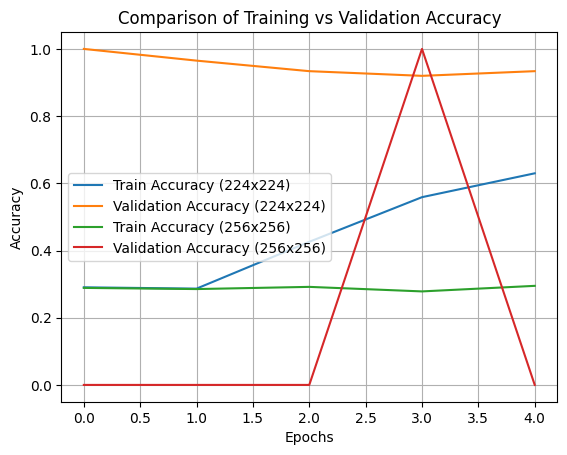

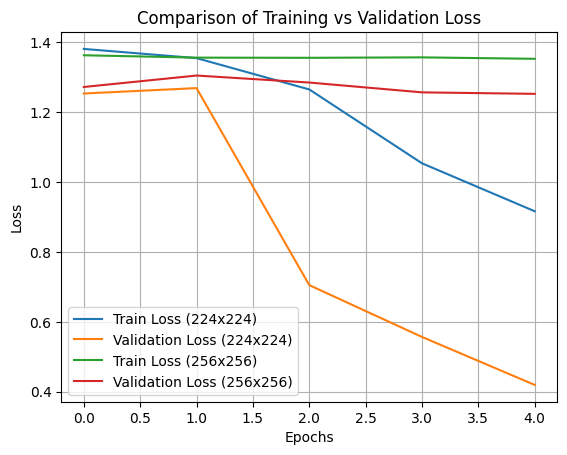

In [ ]:
# Scenario 1: 224x224
plt.plot(history_224.history['accuracy'], label='Train Accuracy (224x224)')
plt.plot(history_224.history['val_accuracy'], label='Validation Accuracy (224x224)')

# Scenario 2: 256x256
plt.plot(history_256.history['accuracy'], label='Train Accuracy (256x256)')
plt.plot(history_256.history['val_accuracy'], label='Validation Accuracy (256x256)')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Scenario 1: 224x224
plt.plot(history_224.history['loss'], label='Train Loss (224x224)')
plt.plot(history_224.history['val_loss'], label='Validation Loss (224x224)')

# Scenario 2: 256x256
plt.plot(history_256.history['loss'], label='Train Loss (256x256)')
plt.plot(history_256.history['val_loss'], label='Validation Loss (256x256)')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparison of Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


# **Hyperparameter Tuning and Evaluation for CNN**

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 3.8 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = models.Sequential([
        layers.Input(shape=(224, 224, 3)),

        layers.Conv2D(hp.Int('filters_1', min_value=16, max_value=32, step=16), (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(hp.Int('filters_2', min_value=32, max_value=64, step=32), (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),

        layers.Dense(hp.Int('dense_units', min_value=64, max_value=128, step=64), activation='relu'),

        layers.Dropout(0.5),

        layers.Dense(4, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=3,
    hyperband_iterations=1,
    directory='my_dir',
    project_name='hyperparameter_tuning'
)

tuner.search(train_ds_224_aug, validation_data=val_ds_224, epochs=3, batch_size=32)


Trial 5 Complete [00h 09m 37s]
val_accuracy: 0.9825783967971802

Best val_accuracy So Far: 0.9825783967971802
Total elapsed time: 00h 28m 24s

Search: Running Trial #6

Value             |Best Value So Far |Hyperparameter
32                |16                |filters_1
32                |64                |filters_2
128               |128               |dense_units
0.0015214         |6.1355e-05        |learning_rate
3                 |3                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
0                 |0                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/3
57/72 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.3750 - loss: 1.6015

KeyboardInterrupt: 

In [ ]:
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Get the best hyperparameters
best_hp = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters
print("Best hyperparameters:", best_hp)


Best hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7f94a94b3920>


In [ ]:
# Evaluate the best model on the test data
test_loss, test_acc = best_model.evaluate(test_ds_224, verbose=1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

# Generate classification report
from sklearn.metrics import classification_report
y_true = []
y_pred = []

# Manually define class names if missing
class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

for images, labels in test_ds_224:
    preds = best_model.predict(images, verbose=0)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

print(classification_report(y_true, y_pred, target_names=class_names))


13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 919ms/step - accuracy: 0.2136 - loss: 2.2386
Test Loss: 1.677363634109497
Test Accuracy: 0.34517765045166016
                  precision    recall  f1-score   support

    glioma_tumor       0.41      0.16      0.23       100
meningioma_tumor       0.38      0.20      0.26       115
        no_tumor       0.49      0.35      0.41       105
 pituitary_tumor       0.27      0.81      0.41        74

        accuracy                           0.35       394
       macro avg       0.39      0.38      0.33       394
    weighted avg       0.40      0.35      0.32       394



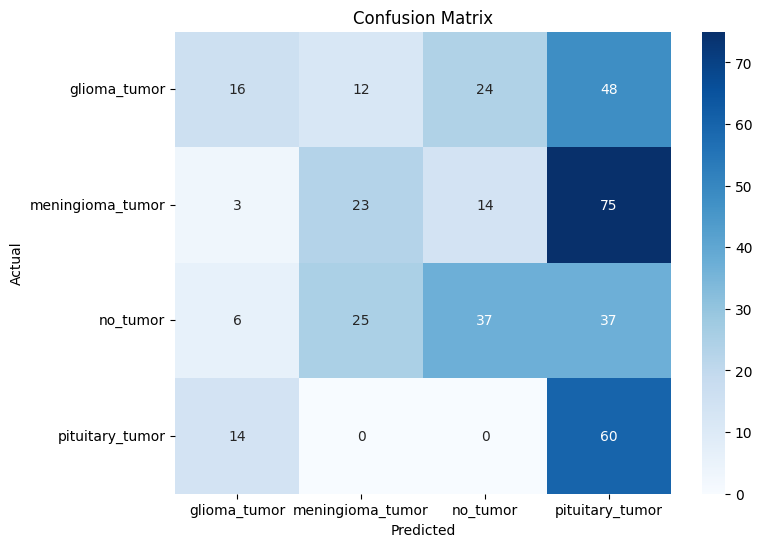

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
